# Coherent Neutrino Spectra in WIMpy_NREFT

**Reference**: the neutrino spectra are taken from the left panel of Fig. 1 in [arXiv:1604.03858](https://arxiv.org/abs/1604.03858).

First we'll load `WIMpy` and a bunch of other libraries:

In [1]:
from WIMpy import DMUtils as DMU

#This is a fudge so that the notebook reads the version of WIMpy
#in my local folder, rather than the pip-installed one...
#import sys
#sys.path.append("../WIMpy/")
#import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams.update({'font.size': 18,'font.family':'serif'})
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('text', usetex=True)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

from tqdm import tqdm

from scipy.interpolate import interp1d

### Initialisation

First, we need to load the neutrino fluxes from file. This loads them in as interpolation functions.

In [2]:
DMU.loadNeutrinoFlux()

Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


### Plotting the neutrino fluxes

These are all the relevant fluxes down to 1 MeV neutrino energies.

Note that the pep flux is a line (i.e. delta function). 

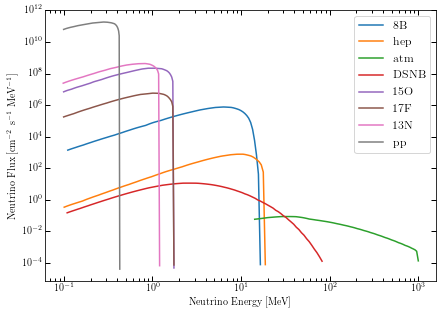

In [3]:
plt.figure(figsize=(7,5))

for flux_name in ["8B", "hep", "atm", "DSNB", "15O", "17F", "13N", "pp"]:
    fluxID = DMU.nu_source_list[flux_name] #This is a dictionary converting between the name of the flux and the index of the interpolation function
    Elist = np.logspace(np.log10(DMU.Enu_min[fluxID]), np.log10(DMU.Enu_max[fluxID]), 100) #The code also stores the min and max neutrino energies for each flux
    plt.loglog(Elist, DMU.neutrino_flux_list[fluxID](Elist), label=flux_name)

plt.legend(fontsize=12)

plt.xlabel(r"Neutrino Energy [MeV]")
plt.ylabel(r"Neutrino Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]")

plt.show()

### Plotting the neutrino spectra on Xenon

To calculate the CEvNS spectrum, we call `dRdE_CEvNS` and specify the `flux_name` keyword depending on which source of neutrinos we're interested in. The options are:

"8B", "hep", "atm", "DSNB"

which should hopefully be self-explanatory. If they're not, I'll do the explanating.

We can also call `dRdE_CEvNS` with the option `flux_name="all"`, which just calls `dRdE_CEvNS` recursively, summing over all 4 neutrino flux types.

First we'll calculate the spectrum in 1/(kg day):

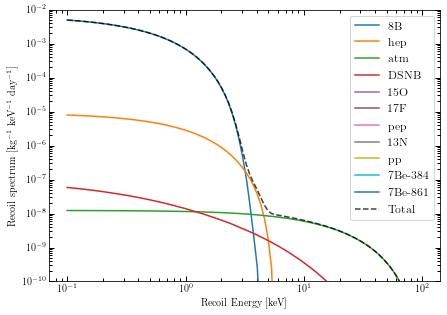

In [4]:
N_p_Xe = 54.
N_n_Xe = 131. - 54.

plt.figure(figsize=(7,5))

ER_list = np.logspace(-1, 2,100)

for flux_name in ["8B", "hep", "atm", "DSNB", "15O", "17F", "pep", "13N", "pp", "7Be-384", "7Be-861"]:
    plt.loglog(ER_list, np.vectorize(DMU.dRdE_CEvNS)(ER_list, N_p_Xe, N_n_Xe, flux_name=flux_name), label=flux_name)

plt.loglog(ER_list, np.vectorize(DMU.dRdE_CEvNS)(ER_list, N_p_Xe, N_n_Xe, flux_name="all"), label="Total", color='k', linestyle='--', alpha=0.75)
    
plt.legend(fontsize=12)

plt.xlabel(r"Recoil Energy [keV]")
plt.ylabel(r"Recoil spectrum [kg$^{-1}$ keV$^{-1}$ day$^{-1}$]")

plt.ylim(1e-10, 1e-2)

plt.show()

Now we'll do it 1/(ton-year), for comparison with the right panel of Fig. 1 in [arXiv:1604.03858](https://arxiv.org/abs/1604.03858). Looks like they agree to me!

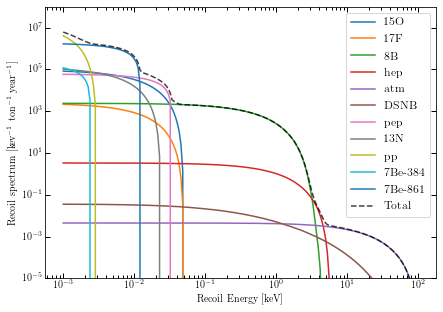

In [5]:
N_p_Xe = 54.
N_n_Xe = 131. - 54.

plt.figure(figsize=(7,5))

ER_list = np.logspace(-3, 2,200)

for flux_name in ["15O", "17F", "8B", "hep", "atm", "DSNB", "pep", "13N", "pp", "7Be-384", "7Be-861"]:
    plt.loglog(ER_list, 365*1e3*np.vectorize(DMU.dRdE_CEvNS)(ER_list, N_p_Xe, N_n_Xe, flux_name=flux_name), label=flux_name)

plt.loglog(ER_list, 365*1e3*np.vectorize(DMU.dRdE_CEvNS)(ER_list, N_p_Xe, N_n_Xe, flux_name="all"), label="Total", color='k', linestyle='--', alpha=0.75)
    
plt.legend(fontsize=12)

plt.xlabel(r"Recoil Energy [keV]")
plt.ylabel(r"Recoil spectrum [kev$^{-1}$ ton$^{-1}$ year$^{-1}$]")

plt.ylim(1e-5, 1e8)

plt.show()

Here, we're including the most relevant neutrino fluxes for recoils down to $\mathcal{O}(100 \,\mathrm{eV})$, if we go any lower in energy then we have to worry about other sources.

Note also that these fluxes have used the benchmark normalisation of Fig. 1 in [arXiv:1604.03858](https://arxiv.org/abs/1604.03858). Each different flux has a systematic uncertainty. A good summary can be found in Table 1 of [arXiv:1604.03858](https://arxiv.org/abs/1604.03858). Thanks again Ciaran.

So the Boron-8 flux has an uncertainty of about 2.5%, while the atmospheric flux has an uncertainty of about 20%. This is why we treat all the fluxes separately.